In [13]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

circuitos=pd.read_excel('dataset_pfinal_ANS.xlsx')
circuitos.set_index(['Id'],inplace=True)

In [14]:
# Estadistcas Descriptivas

print(circuitos.shape)
print(circuitos.describe().T)
circuitos.describe().T.to_excel('circuitos_estadisticas.xlsx')



(1189, 133)
                                                  count         mean          std    min          25%          50%           75%           max
Nominal Voltage Level                            1189.0    13.902271     6.560170  4.000    11.400000    11.400000     13.200000     34.500000
Potencia TIEPI                                   1189.0  7047.638352  6430.083890  0.000  1801.000000  6083.000000  10361.000000  36510.000000
Total Length                                     1189.0    24.588733    37.081139  0.001     6.098000    10.612000     22.303000    362.351000
out of which Overhead Bare Conductor             1189.0    19.772360    37.036999  0.000     1.757000     4.756000     15.968000    361.442000
out of which Overhead Cable                      1189.0     1.201687     2.460267  0.000     0.000000     0.181000      1.336000     24.480000
out of which Underground Cable                   1189.0     3.614773     4.345504  0.000     0.573000     2.438000      5.125000  

In [26]:
# Caracterizacion variables
from numpy import float64

def tipo_variable(variable):
  if variable== object:
    return 'categorica'
  elif  ((variable == float) or (variable == int)) :
    return 'numerica'
  else: return variable

circuitos.info()
df_datatypes = pd.DataFrame(circuitos.dtypes, columns=['tipo_variable'])
df_datatypes['tipo_variable']=df_datatypes.apply(lambda x:tipo_variable(x['tipo_variable']),axis=1)
df_datatypes.to_excel('circuitos_caracterizacion_variables.xlsx')
df_datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 1189
Columns: 133 entries, Codigo Circuito to Municipio/Localidad
dtypes: float64(104), int64(11), object(18)
memory usage: 1.2+ MB


,tipo_variable
Codigo Circuito,categorica
Codigo_de_la_compania,categorica
Zona,categorica
Subarea/Ambito/Conjunto,categorica
Primary Substation ID,categorica
Substation Name,categorica
Transformer,categorica
MV Feeder Code,categorica
Feeder Name MV,categorica
Nominal Voltage Level,numerica


In [42]:
circuitos_null_count = circuitos.count()
circuitos_null_count
df=circuitos.isna().sum().to_frame(name='conteo_nulos')
df.sort_values(by=['conteo_nulos'], ascending=False, inplace=True)
df.to_excel('circuitos_datos faltantes.xlsx')
df

,conteo_nulos
ACTIVIDADES DE TERCEROS,1188
"MANTENIMIENTO ALIMENTADOR 34,5 KV",1188
NECESIDADES AJENAS,1187
MANTENIMIENTO REGLAMENTARIO,1187
GOLPE DE PICO,1186
DISPARO ACCIDENTAL,1186
NUEVAS INSTALACIONES,1184
STR INSTALACION E INTERFERENCIA CLIENTE,1183
FALLA ACTIVO NT 1 PROPIEDAD DEL USUARIO,1183
ERROR MANIOBRA,1182


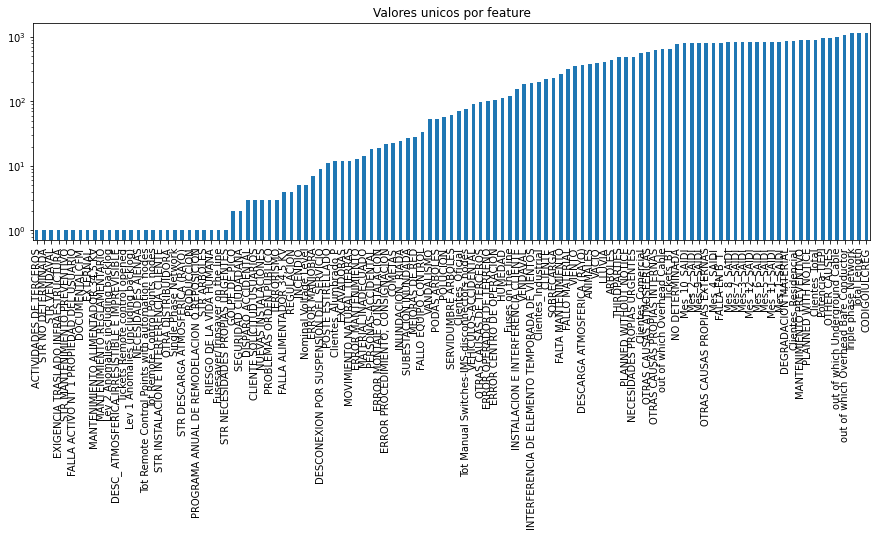

In [50]:
# For each numerical feature compute number of unique entries
unique_values = circuitos.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Valores unicos por feature");

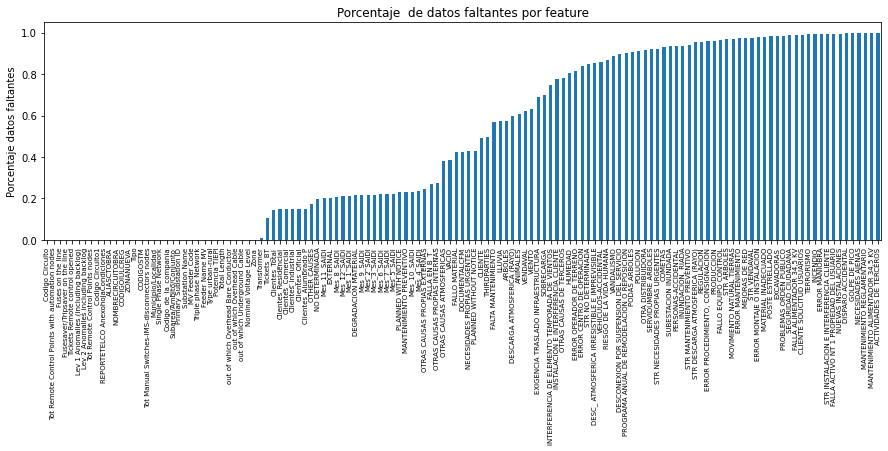

In [51]:
import matplotlib.pyplot as plt
circuitos.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Porcentaje  de datos faltantes por feature",
    ylabel="Porcentaje datos faltantes");
plt.xticks(fontsize='x-small', rotation=90)
plt.show()